In [17]:
import pandas as pd
import numpy as np
from IPython.display import clear_output
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from scipy import stats


#import csv's 
nba_seasons = "Seasons_Stats.csv"
nba_players = "Players.csv"
nba_players_data = "player_data.csv"


In [18]:
nba_seasons_df = pd.read_csv(nba_seasons)

In [19]:
nba_seasons_df.head()

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,...,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,...,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
2,2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,...,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0
3,3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,...,0.559,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0
4,4,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,...,0.548,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0


In [20]:
#create MJ dataframe
jordandf = nba_seasons_df[nba_seasons_df['Player'].str.match('Michael Jordan*', na=False)]
jordandf
#jordan has 15 years of data, lebron has 14. Dropping MJ last season for consistency
jordandf1 = jordandf.drop([16240])
jordandf1

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
7716,7716,1985.0,Michael Jordan*,SG,21.0,CHI,82.0,82.0,3144.0,25.8,...,0.845,167.0,367.0,534.0,481.0,196.0,69.0,291.0,285.0,2313.0
8094,8094,1986.0,Michael Jordan*,SG,22.0,CHI,18.0,7.0,451.0,27.5,...,0.840,23.0,41.0,64.0,53.0,37.0,21.0,45.0,46.0,408.0
8469,8469,1987.0,Michael Jordan*,SG,23.0,CHI,82.0,82.0,3281.0,29.8,...,0.857,166.0,264.0,430.0,377.0,236.0,125.0,272.0,237.0,3041.0
8869,8869,1988.0,Michael Jordan*,SG,24.0,CHI,82.0,82.0,3311.0,31.7,...,0.841,139.0,310.0,449.0,485.0,259.0,131.0,252.0,270.0,2868.0
9297,9297,1989.0,Michael Jordan*,SG,25.0,CHI,81.0,81.0,3255.0,31.1,...,0.850,149.0,503.0,652.0,650.0,234.0,65.0,290.0,247.0,2633.0
9747,9747,1990.0,Michael Jordan*,SG,26.0,CHI,82.0,82.0,3197.0,31.2,...,0.848,143.0,422.0,565.0,519.0,227.0,54.0,247.0,241.0,2753.0
10212,10212,1991.0,Michael Jordan*,SG,27.0,CHI,82.0,82.0,3034.0,31.6,...,0.851,118.0,374.0,492.0,453.0,223.0,83.0,202.0,229.0,2580.0
10666,10666,1992.0,Michael Jordan*,SG,28.0,CHI,80.0,80.0,3102.0,27.7,...,0.832,91.0,420.0,511.0,489.0,182.0,75.0,200.0,201.0,2404.0
11106,11106,1993.0,Michael Jordan*,SG,29.0,CHI,78.0,78.0,3067.0,29.7,...,0.837,135.0,387.0,522.0,428.0,221.0,61.0,207.0,188.0,2541.0
12048,12048,1995.0,Michael Jordan*,SG,31.0,CHI,17.0,17.0,668.0,22.1,...,0.801,25.0,92.0,117.0,90.0,30.0,13.0,35.0,47.0,457.0


In [21]:
jordandf1.columns

Index(['Unnamed: 0', 'Year', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP',
       'PER', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%',
       'BLK%', 'TOV%', 'USG%', 'blanl', 'OWS', 'DWS', 'WS', 'WS/48', 'blank2',
       'OBPM', 'DBPM', 'BPM', 'VORP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%',
       '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB',
       'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')

In [22]:
for newcol in ['O_Index','D_Index','Overall_Index']:
    jordandf1[newcol]=0
    
jordandf1.head()

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,TRB,AST,STL,BLK,TOV,PF,PTS,O_Index,D_Index,Overall_Index
7716,7716,1985.0,Michael Jordan*,SG,21.0,CHI,82.0,82.0,3144.0,25.8,...,534.0,481.0,196.0,69.0,291.0,285.0,2313.0,0,0,0
8094,8094,1986.0,Michael Jordan*,SG,22.0,CHI,18.0,7.0,451.0,27.5,...,64.0,53.0,37.0,21.0,45.0,46.0,408.0,0,0,0
8469,8469,1987.0,Michael Jordan*,SG,23.0,CHI,82.0,82.0,3281.0,29.8,...,430.0,377.0,236.0,125.0,272.0,237.0,3041.0,0,0,0
8869,8869,1988.0,Michael Jordan*,SG,24.0,CHI,82.0,82.0,3311.0,31.7,...,449.0,485.0,259.0,131.0,252.0,270.0,2868.0,0,0,0
9297,9297,1989.0,Michael Jordan*,SG,25.0,CHI,81.0,81.0,3255.0,31.1,...,652.0,650.0,234.0,65.0,290.0,247.0,2633.0,0,0,0


In [23]:
#O_index = df_2010.


#(TRB * Value_TRB)+(BLK * Value_BLK)+(STL * Value_STL)

#for loop through data frame using itterows and run formulas against the values

for index, row in jordandf1.iterrows():
    
    clear_output(wait=True)

    # get stats numbers from df
    #rebound_count = row['TRB']
    #block_count = row['BLK']
    #steal_count = row['STL']
    #game_count = row['G']
    
    defensive_value = ((.4 * row['TRB'])+(.3 * row['BLK'])+(.3 * row['STL']))/row['G']
    offensive_value = ((.1 * row["FG"])+(.2 * row["AST"])+(.7 * row["PTS"]))/row['G']
    
    overall_value = defensive_value + offensive_value
    
    Points_pg = row['PTS']/row['G']
    AST_PG = row['AST']/row['G']
    RP_G = row['TRB']/row['G']
    BLK_PG = row['BLK']/row['G']
    STL_PG = row['STL']/row['G']
    FG_PG = row['FG']/row['G']
    
    
    jordandf1.loc[index, 'O_Index'] = offensive_value
    jordandf1.loc[index, 'D_Index'] = defensive_value
    jordandf1.loc[index, 'Overall_Index'] = overall_value
    jordandf1.loc[index, 'PPG'] = Points_pg
    jordandf1.loc[index, 'ASTPG'] = AST_PG
    jordandf1.loc[index, 'RPG'] = RP_G
    jordandf1.loc[index, 'BLKPG'] = BLK_PG
    jordandf1.loc[index, 'STLPG'] = STL_PG
    jordandf1.loc[index, 'FGPG'] = FG_PG
    
    #this is just a progress bar- the for loop takes about 1 hour
    print("current progress:", np.round(index/len(jordandf1) *100, 2), "%")
    
    
    #df_2010.loc[index, 'Overall_Index'] = results_lng
 #view data frame   
jordandf1

current progress: 112507.14 %


,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,PTS,O_Index,D_Index,Overall_Index,PPG,ASTPG,RPG,BLKPG,STLPG,FGPG
7716,7716,1985.0,Michael Jordan*,SG,21.0,CHI,82.0,82.0,3144.0,25.8,...,2313.0,21.939024,3.574390,25.513415,28.207317,5.865854,6.512195,0.841463,2.390244,10.207317
8094,8094,1986.0,Michael Jordan*,SG,22.0,CHI,18.0,7.0,451.0,27.5,...,408.0,17.288889,2.388889,19.677778,22.666667,2.944444,3.555556,1.166667,2.055556,8.333333
8469,8469,1987.0,Michael Jordan*,SG,23.0,CHI,82.0,82.0,3281.0,29.8,...,3041.0,28.218293,3.418293,31.636585,37.085366,4.597561,5.243902,1.524390,2.878049,13.390244
8869,8869,1988.0,Michael Jordan*,SG,24.0,CHI,82.0,82.0,3311.0,31.7,...,2868.0,26.969512,3.617073,30.586585,34.975610,5.914634,5.475610,1.597561,3.158537,13.036585
9297,9297,1989.0,Michael Jordan*,SG,25.0,CHI,81.0,81.0,3255.0,31.1,...,2633.0,25.551852,4.327160,29.879012,32.506173,8.024691,8.049383,0.802469,2.888889,11.925926
9747,9747,1990.0,Michael Jordan*,SG,26.0,CHI,82.0,82.0,3197.0,31.2,...,2753.0,26.028049,3.784146,29.812195,33.573171,6.329268,6.890244,0.658537,2.768293,12.609756
10212,10212,1991.0,Michael Jordan*,SG,27.0,CHI,82.0,82.0,3034.0,31.6,...,2580.0,24.336585,3.519512,27.856098,31.463415,5.524390,6.000000,1.012195,2.719512,12.073171
10666,10666,1992.0,Michael Jordan*,SG,28.0,CHI,80.0,80.0,3102.0,27.7,...,2404.0,23.436250,3.518750,26.955000,30.050000,6.112500,6.387500,0.937500,2.275000,11.787500
11106,11106,1993.0,Michael Jordan*,SG,29.0,CHI,78.0,78.0,3067.0,29.7,...,2541.0,25.173077,3.761538,28.934615,32.576923,5.487179,6.692308,0.782051,2.833333,12.717949
12048,12048,1995.0,Michael Jordan*,SG,31.0,CHI,17.0,17.0,668.0,22.1,...,457.0,20.852941,3.511765,24.364706,26.882353,5.294118,6.882353,0.764706,1.764706,9.764706


In [24]:
#remove % from column heads as they are hard to manipulate
jordandf1.columns = [x.strip().replace('%', 'pct') for x in jordandf1.columns]
jordandf1.columns = [x.strip().replace('/', 'per') for x in jordandf1.columns]
jordandf1.head()
jordandf1.columns

Index(['Unnamed: 0', 'Year', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP',
       'PER', 'TSpct', '3PAr', 'FTr', 'ORBpct', 'DRBpct', 'TRBpct', 'ASTpct',
       'STLpct', 'BLKpct', 'TOVpct', 'USGpct', 'blanl', 'OWS', 'DWS', 'WS',
       'WSper48', 'blank2', 'OBPM', 'DBPM', 'BPM', 'VORP', 'FG', 'FGA',
       'FGpct', '3P', '3PA', '3Ppct', '2P', '2PA', '2Ppct', 'eFGpct', 'FT',
       'FTA', 'FTpct', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF',
       'PTS', 'O_Index', 'D_Index', 'Overall_Index', 'PPG', 'ASTPG', 'RPG',
       'BLKPG', 'STLPG', 'FGPG'],
      dtype='object')

In [25]:
jordan_years = jordandf1.Year.tolist()
jordan_GS = jordandf1.GS.tolist()
jordan_PER = jordandf1.PER.tolist()
jordan_TS = jordandf1.TSpct.tolist()
jordan_MP = jordandf1.MP.tolist()
jordan_USGpct = jordandf1.USGpct.tolist()
jordan_OWS = jordandf1.OWS.tolist()
jordan_DWS = jordandf1.DWS.tolist()
jordan_WS = jordandf1.WS.tolist()
jordan_WS48 = jordandf1.WSper48.tolist()
jordan_VORP = jordandf1.VORP.tolist()
jordan_ages = jordandf1.Age.tolist()
comparison_years = ['1','2','3','4','5','6','7','8','9','10','11','12','13','14']



In [26]:
lebrondf = nba_seasons_df[nba_seasons_df['Player'].str.match('LeBron James', na=False)]
lebrondf

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
16746,16746,2004.0,LeBron James,SG,19.0,CLE,79.0,79.0,3122.0,18.3,...,0.754,99.0,333.0,432.0,465.0,130.0,58.0,273.0,149.0,1654.0
17344,17344,2005.0,LeBron James,SF,20.0,CLE,80.0,80.0,3388.0,25.7,...,0.750,111.0,477.0,588.0,577.0,177.0,52.0,262.0,146.0,2175.0
17918,17918,2006.0,LeBron James,SF,21.0,CLE,79.0,79.0,3361.0,28.1,...,0.738,75.0,481.0,556.0,521.0,123.0,66.0,260.0,181.0,2478.0
18460,18460,2007.0,LeBron James,SF,22.0,CLE,78.0,78.0,3190.0,24.5,...,0.698,83.0,443.0,526.0,470.0,125.0,55.0,250.0,171.0,2132.0
19017,19017,2008.0,LeBron James,SF,23.0,CLE,75.0,74.0,3027.0,29.1,...,0.712,133.0,459.0,592.0,539.0,138.0,81.0,255.0,165.0,2250.0
19611,19611,2009.0,LeBron James,SF,24.0,CLE,81.0,81.0,3054.0,31.7,...,0.780,106.0,507.0,613.0,587.0,137.0,93.0,241.0,139.0,2304.0
20207,20207,2010.0,LeBron James,SF,25.0,CLE,76.0,76.0,2966.0,31.1,...,0.767,71.0,483.0,554.0,651.0,125.0,77.0,261.0,119.0,2258.0
20812,20812,2011.0,LeBron James,SF,26.0,MIA,79.0,79.0,3063.0,27.3,...,0.759,80.0,510.0,590.0,554.0,124.0,50.0,284.0,163.0,2111.0
21395,21395,2012.0,LeBron James,SF,27.0,MIA,62.0,62.0,2326.0,30.7,...,0.771,94.0,398.0,492.0,387.0,115.0,50.0,213.0,96.0,1683.0
21933,21933,2013.0,LeBron James,PF,28.0,MIA,76.0,76.0,2877.0,31.6,...,0.753,97.0,513.0,610.0,551.0,129.0,67.0,226.0,110.0,2036.0


In [27]:
for newcol in ['O_Index','D_Index','Overall_Index']:
    lebrondf[newcol]=0
    
lebrondf

C:\Users\beach\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,TRB,AST,STL,BLK,TOV,PF,PTS,O_Index,D_Index,Overall_Index
16746,16746,2004.0,LeBron James,SG,19.0,CLE,79.0,79.0,3122.0,18.3,...,432.0,465.0,130.0,58.0,273.0,149.0,1654.0,0,0,0
17344,17344,2005.0,LeBron James,SF,20.0,CLE,80.0,80.0,3388.0,25.7,...,588.0,577.0,177.0,52.0,262.0,146.0,2175.0,0,0,0
17918,17918,2006.0,LeBron James,SF,21.0,CLE,79.0,79.0,3361.0,28.1,...,556.0,521.0,123.0,66.0,260.0,181.0,2478.0,0,0,0
18460,18460,2007.0,LeBron James,SF,22.0,CLE,78.0,78.0,3190.0,24.5,...,526.0,470.0,125.0,55.0,250.0,171.0,2132.0,0,0,0
19017,19017,2008.0,LeBron James,SF,23.0,CLE,75.0,74.0,3027.0,29.1,...,592.0,539.0,138.0,81.0,255.0,165.0,2250.0,0,0,0
19611,19611,2009.0,LeBron James,SF,24.0,CLE,81.0,81.0,3054.0,31.7,...,613.0,587.0,137.0,93.0,241.0,139.0,2304.0,0,0,0
20207,20207,2010.0,LeBron James,SF,25.0,CLE,76.0,76.0,2966.0,31.1,...,554.0,651.0,125.0,77.0,261.0,119.0,2258.0,0,0,0
20812,20812,2011.0,LeBron James,SF,26.0,MIA,79.0,79.0,3063.0,27.3,...,590.0,554.0,124.0,50.0,284.0,163.0,2111.0,0,0,0
21395,21395,2012.0,LeBron James,SF,27.0,MIA,62.0,62.0,2326.0,30.7,...,492.0,387.0,115.0,50.0,213.0,96.0,1683.0,0,0,0
21933,21933,2013.0,LeBron James,PF,28.0,MIA,76.0,76.0,2877.0,31.6,...,610.0,551.0,129.0,67.0,226.0,110.0,2036.0,0,0,0


In [28]:
#O_index = df_2010.


#(TRB * Value_TRB)+(BLK * Value_BLK)+(STL * Value_STL)

#for loop through data frame using itterows and run formulas against the values

for index, row in lebrondf.iterrows():
    
    clear_output(wait=True)

    # get stats numbers from df
    #rebound_count = row['TRB']
    #block_count = row['BLK']
    #steal_count = row['STL']
    #game_count = row['G']
    
    defensive_value = ((.4 * row['TRB'])+(.3 * row['BLK'])+(.3 * row['STL']))/row['G']
    offensive_value = ((.1 * row["FG"])+(.2 * row["AST"])+(.7 * row["PTS"]))/row['G']
    
    overall_value = defensive_value + offensive_value
    
    Points_pg = row['PTS']/row['G']
    AST_PG = row['AST']/row['G']
    RP_G = row['TRB']/row['G']
    BLK_PG = row['BLK']/row['G']
    STL_PG = row['STL']/row['G']
    FG_PG = row['FG']/row['G']
    
    
    lebrondf.loc[index, 'O_Index'] = offensive_value
    lebrondf.loc[index, 'D_Index'] = defensive_value
    lebrondf.loc[index, 'Overall_Index'] = overall_value
    lebrondf.loc[index, 'PPG'] = Points_pg
    lebrondf.loc[index, 'ASTPG'] = AST_PG
    lebrondf.loc[index, 'RPG'] = RP_G
    lebrondf.loc[index, 'BLKPG'] = BLK_PG
    lebrondf.loc[index, 'STLPG'] = STL_PG
    lebrondf.loc[index, 'FGPG'] = FG_PG
    
    #this is just a progress bar- the for loop takes about 1 hour
    print("current progress:", np.round(index/len(lebrondf) *100, 2), "%")
    
    
    #df_2010.loc[index, 'Overall_Index'] = results_lng
 #view data frame   
lebrondf

current progress: 174035.71 %


,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,PTS,O_Index,D_Index,Overall_Index,PPG,ASTPG,RPG,BLKPG,STLPG,FGPG
16746,16746,2004.0,LeBron James,SG,19.0,CLE,79.0,79.0,3122.0,18.3,...,1654.0,16.620253,2.901266,19.521519,20.936709,5.886076,5.468354,0.734177,1.645570,7.873418
17344,17344,2005.0,LeBron James,SF,20.0,CLE,80.0,80.0,3388.0,25.7,...,2175.0,21.467500,3.798750,25.266250,27.187500,7.212500,7.350000,0.650000,2.212500,9.937500
17918,17918,2006.0,LeBron James,SF,21.0,CLE,79.0,79.0,3361.0,28.1,...,2478.0,24.383544,3.532911,27.916456,31.367089,6.594937,7.037975,0.835443,1.556962,11.075949
18460,18460,2007.0,LeBron James,SF,22.0,CLE,78.0,78.0,3190.0,24.5,...,2132.0,21.328205,3.389744,24.717949,27.333333,6.025641,6.743590,0.705128,1.602564,9.897436
19017,19017,2008.0,LeBron James,SF,23.0,CLE,75.0,74.0,3027.0,29.1,...,2250.0,23.496000,4.033333,27.529333,30.000000,7.186667,7.893333,1.080000,1.840000,10.586667
19611,19611,2009.0,LeBron James,SF,24.0,CLE,81.0,81.0,3054.0,31.7,...,2304.0,22.334568,3.879012,26.213580,28.444444,7.246914,7.567901,1.148148,1.691358,9.740741
20207,20207,2010.0,LeBron James,SF,25.0,CLE,76.0,76.0,2966.0,31.1,...,2258.0,23.521053,3.713158,27.234211,29.710526,8.565789,7.289474,1.013158,1.644737,10.105263
20812,20812,2011.0,LeBron James,SF,26.0,MIA,79.0,79.0,3063.0,27.3,...,2111.0,21.067089,3.648101,24.715190,26.721519,7.012658,7.468354,0.632911,1.569620,9.594937
21395,21395,2012.0,LeBron James,SF,27.0,MIA,62.0,62.0,2326.0,30.7,...,1683.0,21.251613,3.972581,25.224194,27.145161,6.241935,7.935484,0.806452,1.854839,10.016129
21933,21933,2013.0,LeBron James,PF,28.0,MIA,76.0,76.0,2877.0,31.6,...,2036.0,21.209211,3.984211,25.193421,26.789474,7.250000,8.026316,0.881579,1.697368,10.065789


In [29]:
lebrondf.columns = [x.strip().replace('%', 'pct') for x in lebrondf.columns]
lebrondf.columns = [x.strip().replace('/', 'per') for x in lebrondf.columns]
lebrondf.head()
lebrondf.columns

Index(['Unnamed: 0', 'Year', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP',
       'PER', 'TSpct', '3PAr', 'FTr', 'ORBpct', 'DRBpct', 'TRBpct', 'ASTpct',
       'STLpct', 'BLKpct', 'TOVpct', 'USGpct', 'blanl', 'OWS', 'DWS', 'WS',
       'WSper48', 'blank2', 'OBPM', 'DBPM', 'BPM', 'VORP', 'FG', 'FGA',
       'FGpct', '3P', '3PA', '3Ppct', '2P', '2PA', '2Ppct', 'eFGpct', 'FT',
       'FTA', 'FTpct', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF',
       'PTS', 'O_Index', 'D_Index', 'Overall_Index', 'PPG', 'ASTPG', 'RPG',
       'BLKPG', 'STLPG', 'FGPG'],
      dtype='object')

In [30]:
lebron_years = lebrondf.Year.tolist()
lebron_GS = lebrondf.GS.tolist()
lebron_PER = lebrondf.PER.tolist()
lebron_TS = lebrondf.TSpct.tolist()
lebron_mp = lebrondf.MP.tolist()
lebron_USGpct = lebrondf.USGpct.tolist()
lebron_OWS = lebrondf.OWS.tolist()
lebron_DWS = lebrondf.DWS.tolist()
lebron_WS = lebrondf.WS.tolist()
lebron_WS48 = lebrondf.WSper48.tolist()
lebron_VORP = lebrondf.VORP.tolist()
lebron_ages = lebrondf.Age.tolist()

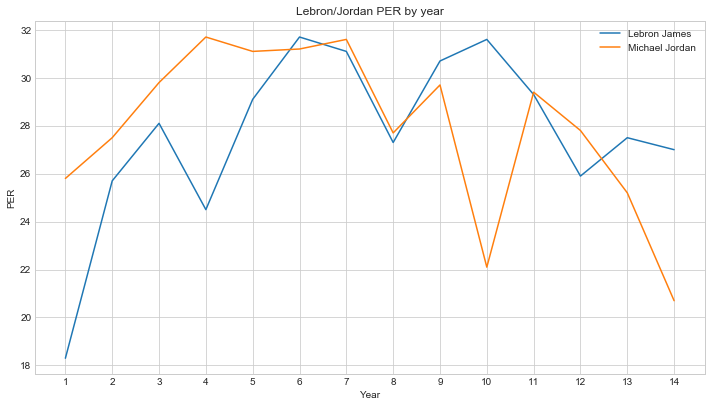

In [31]:
#PER graph
import numpy as np
import pylab as plt
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np


plt.plot(comparison_years,lebron_PER, label='Lebron James')
plt.plot(comparison_years, jordan_PER, label='Michael Jordan')
plt.title("Lebron/Jordan PER by year")
plt.xlabel("Year")
plt.ylabel("PER");
plt.legend();
fig = plt.gcf()
fig.set_size_inches(12.0, 6.5)
fig.savefig('PER_14years.png', dpi=100)
plt.show()


#plt.line(comparison_years,lebron_PER,color='k')
#plt.line(comparison_years,jordan_PER,color='g')
#plt.show()

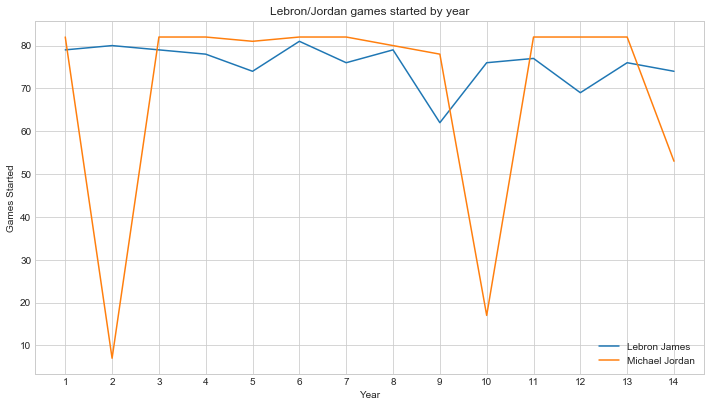

In [32]:
#games started by year
plt.plot(comparison_years,lebron_GS, label='Lebron James')
plt.plot(comparison_years, jordan_GS, label='Michael Jordan')
plt.title("Lebron/Jordan games started by year")
plt.xlabel("Year")
plt.ylabel("Games Started");
plt.legend();
fig = plt.gcf()
fig.set_size_inches(12.0, 6.5)
fig.savefig('GStart_14years.png', dpi=100)
plt.show()


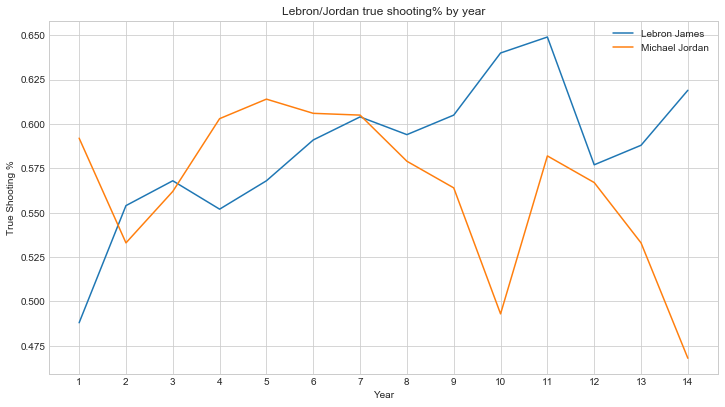

In [33]:
plt.plot(comparison_years,lebron_TS, label='Lebron James')
plt.plot(comparison_years, jordan_TS, label='Michael Jordan')
plt.title("Lebron/Jordan true shooting% by year")
plt.xlabel("Year")
plt.ylabel("True Shooting %");
plt.legend();
fig = plt.gcf()
fig.set_size_inches(12.0, 6.5)
fig.savefig('TS%_14years.png', dpi=100)
plt.show()


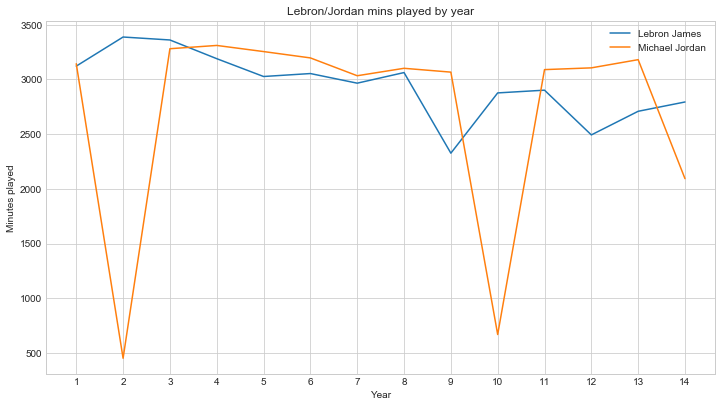

In [34]:
plt.plot(comparison_years,lebron_mp, label='Lebron James')
plt.plot(comparison_years, jordan_MP, label='Michael Jordan')
plt.title("Lebron/Jordan mins played by year")
plt.xlabel("Year")
plt.ylabel("Minutes played");
plt.legend();
fig = plt.gcf()
fig.set_size_inches(12.0, 6.5)
fig.savefig('MP_14years.png', dpi=100)
plt.show()


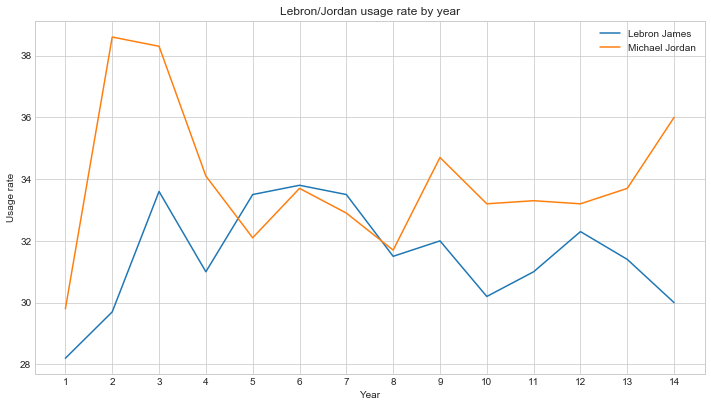

In [35]:
plt.plot(comparison_years,lebron_USGpct, label='Lebron James')
plt.plot(comparison_years, jordan_USGpct, label='Michael Jordan')
plt.title("Lebron/Jordan usage rate by year")
plt.xlabel("Year")
plt.ylabel("Usage rate");
plt.legend();
fig = plt.gcf()
fig.set_size_inches(12.0, 6.5)
fig.savefig('Usage_14years.png', dpi=100)
plt.show()


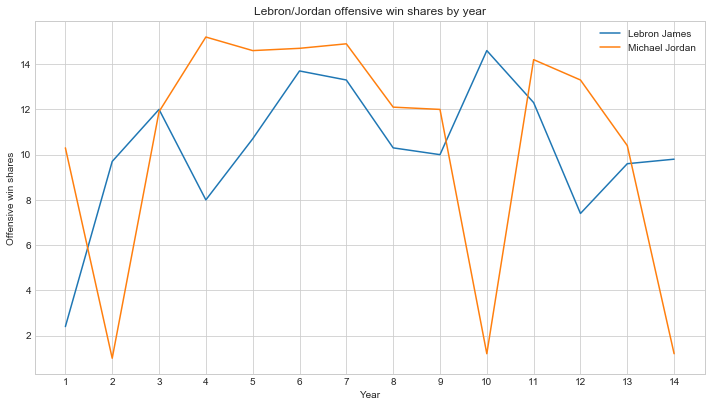

In [36]:
plt.plot(comparison_years,lebron_OWS, label='Lebron James')
plt.plot(comparison_years, jordan_OWS, label='Michael Jordan')
plt.title("Lebron/Jordan offensive win shares by year")
plt.xlabel("Year")
plt.ylabel("Offensive win shares");
plt.legend();
fig = plt.gcf()
fig.set_size_inches(12.0, 6.5)
fig.savefig('OWS_14years.png', dpi=100)
plt.show()


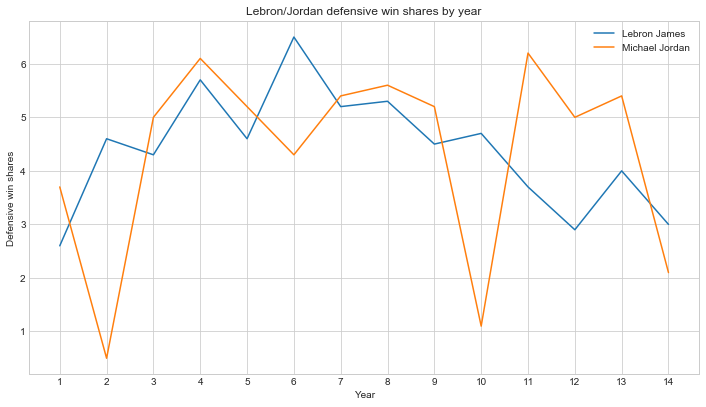

In [37]:
plt.plot(comparison_years,lebron_DWS, label='Lebron James')
plt.plot(comparison_years, jordan_DWS, label='Michael Jordan')
plt.title("Lebron/Jordan defensive win shares by year")
plt.xlabel("Year")
plt.ylabel("Defensive win shares");
plt.legend();
fig = plt.gcf()
fig.set_size_inches(12.0, 6.5)
fig.savefig('DWS_14years.png', dpi=100)


plt.show()


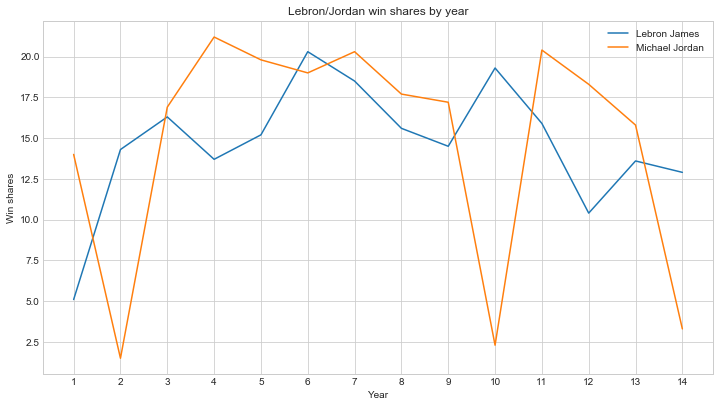

In [38]:
plt.plot(comparison_years,lebron_WS, label='Lebron James')
plt.plot(comparison_years, jordan_WS, label='Michael Jordan')
plt.title("Lebron/Jordan win shares by year")
plt.xlabel("Year")
plt.ylabel("Win shares");
plt.legend();
fig = plt.gcf()
fig.set_size_inches(12.0, 6.5)
fig.savefig('WS_14years.png', dpi=100)
plt.show()


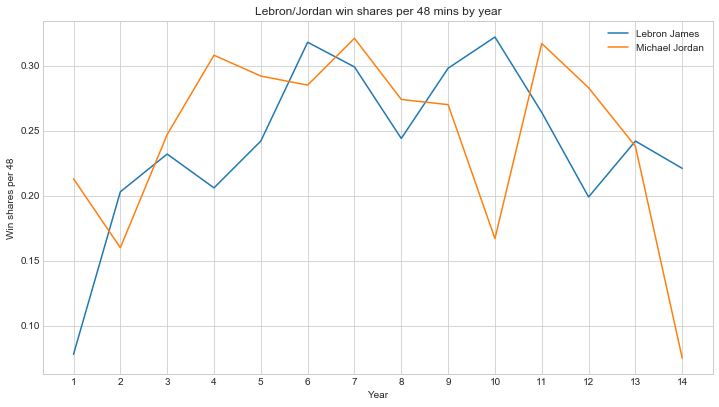

In [39]:
plt.plot(comparison_years,lebron_WS48, label='Lebron James')
plt.plot(comparison_years, jordan_WS48, label='Michael Jordan')
plt.title("Lebron/Jordan win shares per 48 mins by year")
plt.xlabel("Year")
plt.ylabel("Win shares per 48");
plt.legend();
fig = plt.gcf()
fig.set_size_inches(12.0, 6.5)
fig.savefig('WIN_48_14years.png', dpi=100)
plt.show()

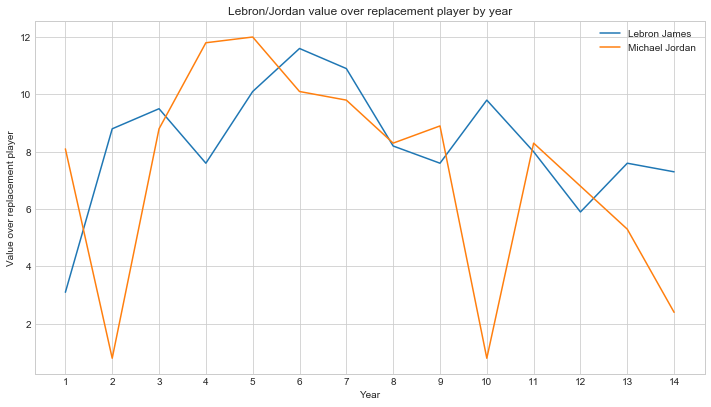

In [40]:
plt.plot(comparison_years,lebron_VORP, label='Lebron James')
plt.plot(comparison_years, jordan_VORP, label='Michael Jordan')
plt.title("Lebron/Jordan value over replacement player by year")
plt.xlabel("Year")
plt.ylabel("Value over replacement player");
plt.legend();

fig = plt.gcf()
fig.set_size_inches(12.0, 6.5)
fig.savefig('VORP_14years.png', dpi=100)

plt.show()




In [41]:
#what ages do we have data for each party
print(jordan_ages)
print(lebron_ages)

#these are the ages in common
#common_ages = ['21','22','23','24','25','26','27','28','29','31','32']
#print (common_ages)

[21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 31.0, 32.0, 33.0, 34.0, 38.0]
[19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0]


In [42]:
#create data frame for only the player years we need 21-32
jordanyearsdf = jordandf1.loc[(jordandf1['Age'] >= 21) & (jordandf1['Age'] <= 32)]
jordanyearsdf.to_html('jordan_years.html')

jordanyearsdf

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,PTS,O_Index,D_Index,Overall_Index,PPG,ASTPG,RPG,BLKPG,STLPG,FGPG
7716,7716,1985.0,Michael Jordan*,SG,21.0,CHI,82.0,82.0,3144.0,25.8,...,2313.0,21.939024,3.574390,25.513415,28.207317,5.865854,6.512195,0.841463,2.390244,10.207317
8094,8094,1986.0,Michael Jordan*,SG,22.0,CHI,18.0,7.0,451.0,27.5,...,408.0,17.288889,2.388889,19.677778,22.666667,2.944444,3.555556,1.166667,2.055556,8.333333
8469,8469,1987.0,Michael Jordan*,SG,23.0,CHI,82.0,82.0,3281.0,29.8,...,3041.0,28.218293,3.418293,31.636585,37.085366,4.597561,5.243902,1.524390,2.878049,13.390244
8869,8869,1988.0,Michael Jordan*,SG,24.0,CHI,82.0,82.0,3311.0,31.7,...,2868.0,26.969512,3.617073,30.586585,34.975610,5.914634,5.475610,1.597561,3.158537,13.036585
9297,9297,1989.0,Michael Jordan*,SG,25.0,CHI,81.0,81.0,3255.0,31.1,...,2633.0,25.551852,4.327160,29.879012,32.506173,8.024691,8.049383,0.802469,2.888889,11.925926
9747,9747,1990.0,Michael Jordan*,SG,26.0,CHI,82.0,82.0,3197.0,31.2,...,2753.0,26.028049,3.784146,29.812195,33.573171,6.329268,6.890244,0.658537,2.768293,12.609756
10212,10212,1991.0,Michael Jordan*,SG,27.0,CHI,82.0,82.0,3034.0,31.6,...,2580.0,24.336585,3.519512,27.856098,31.463415,5.524390,6.000000,1.012195,2.719512,12.073171
10666,10666,1992.0,Michael Jordan*,SG,28.0,CHI,80.0,80.0,3102.0,27.7,...,2404.0,23.436250,3.518750,26.955000,30.050000,6.112500,6.387500,0.937500,2.275000,11.787500
11106,11106,1993.0,Michael Jordan*,SG,29.0,CHI,78.0,78.0,3067.0,29.7,...,2541.0,25.173077,3.761538,28.934615,32.576923,5.487179,6.692308,0.782051,2.833333,12.717949
12048,12048,1995.0,Michael Jordan*,SG,31.0,CHI,17.0,17.0,668.0,22.1,...,457.0,20.852941,3.511765,24.364706,26.882353,5.294118,6.882353,0.764706,1.764706,9.764706


In [43]:
lebronyearsdf = lebrondf.loc[(lebrondf['Age'] >= 21) & (lebrondf['Age'] <= 32)]
#dropping year 30 because jordan diddnt play that year
lebronyearsdf = lebronyearsdf.drop([23154])
lebronyearsdf.to_html('lebron_years.html')

lebronyearsdf

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,PTS,O_Index,D_Index,Overall_Index,PPG,ASTPG,RPG,BLKPG,STLPG,FGPG
17918,17918,2006.0,LeBron James,SF,21.0,CLE,79.0,79.0,3361.0,28.1,...,2478.0,24.383544,3.532911,27.916456,31.367089,6.594937,7.037975,0.835443,1.556962,11.075949
18460,18460,2007.0,LeBron James,SF,22.0,CLE,78.0,78.0,3190.0,24.5,...,2132.0,21.328205,3.389744,24.717949,27.333333,6.025641,6.743590,0.705128,1.602564,9.897436
19017,19017,2008.0,LeBron James,SF,23.0,CLE,75.0,74.0,3027.0,29.1,...,2250.0,23.496000,4.033333,27.529333,30.000000,7.186667,7.893333,1.080000,1.840000,10.586667
19611,19611,2009.0,LeBron James,SF,24.0,CLE,81.0,81.0,3054.0,31.7,...,2304.0,22.334568,3.879012,26.213580,28.444444,7.246914,7.567901,1.148148,1.691358,9.740741
20207,20207,2010.0,LeBron James,SF,25.0,CLE,76.0,76.0,2966.0,31.1,...,2258.0,23.521053,3.713158,27.234211,29.710526,8.565789,7.289474,1.013158,1.644737,10.105263
20812,20812,2011.0,LeBron James,SF,26.0,MIA,79.0,79.0,3063.0,27.3,...,2111.0,21.067089,3.648101,24.715190,26.721519,7.012658,7.468354,0.632911,1.569620,9.594937
21395,21395,2012.0,LeBron James,SF,27.0,MIA,62.0,62.0,2326.0,30.7,...,1683.0,21.251613,3.972581,25.224194,27.145161,6.241935,7.935484,0.806452,1.854839,10.016129
21933,21933,2013.0,LeBron James,PF,28.0,MIA,76.0,76.0,2877.0,31.6,...,2036.0,21.209211,3.984211,25.193421,26.789474,7.250000,8.026316,0.881579,1.697368,10.065789
22548,22548,2014.0,LeBron James,PF,29.0,MIA,77.0,77.0,2902.0,29.3,...,2089.0,21.254545,3.341558,24.596104,27.129870,6.337662,6.922078,0.337662,1.571429,9.961039
23781,23781,2016.0,LeBron James,SF,31.0,CLE,76.0,76.0,2709.0,27.5,...,1920.0,20.006579,3.577632,23.584211,25.263158,6.763158,7.434211,0.644737,1.368421,9.697368


In [44]:
o_indexjordan = jordanyearsdf.O_Index.tolist()
d_indexjordan = jordanyearsdf.D_Index.tolist()
print(o_indexjordan)

[21.9390243902439, 17.288888888888888, 28.218292682926826, 26.96951219512195, 25.55185185185185, 26.0280487804878, 24.336585365853658, 23.43625, 25.17307692307692, 20.852941176470587, 23.240243902439023]


In [45]:
o_indexlebron = lebronyearsdf.O_Index.tolist()
d_indexlebron = lebronyearsdf.D_Index.tolist()
print(d_indexlebron)

[3.5329113924050635, 3.3897435897435892, 4.033333333333333, 3.879012345679013, 3.7131578947368427, 3.6481012658227847, 3.9725806451612904, 3.9842105263157896, 3.341558441558442, 3.577631578947368, 4.010810810810811]


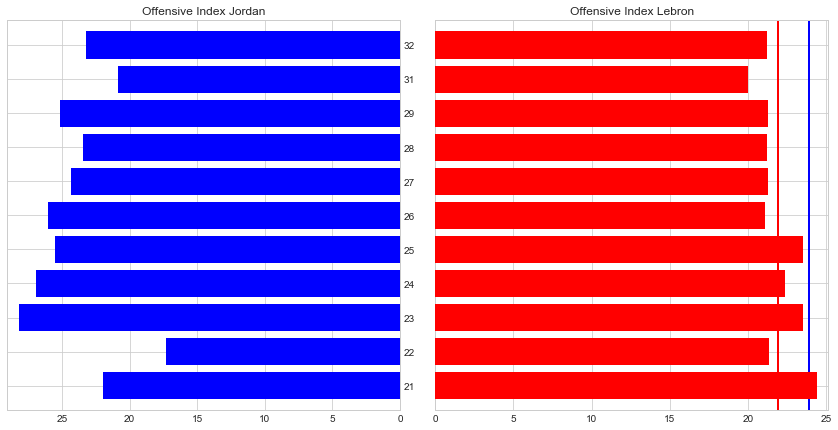

In [46]:
# Data
#create offensive index horizontal bar graphs


#these are the ages in common
common_ages = np.array([21,22,23,24,25,26,27,28,29,31,32])
o_indexjordan1 = np.array([21.9390243902439, 17.288888888888888, 28.218292682926826, 26.96951219512195, 25.55185185185185, 26.0280487804878, 24.336585365853658, 23.43625, 25.17307692307692, 20.852941176470587, 23.240243902439023]) 
o_indexlebron1 = np.array([24.383544303797468, 21.328205128205127, 23.496000000000002, 22.334567901234568, 23.521052631578947, 21.067088607594933, 21.251612903225805, 21.209210526315786, 21.254545454545454, 20.00657894736842, 21.22432432432432])

idx = common_ages.argsort()
common_ages, o_indexjordan1, o_indexlebron1 = [np.take(x, idx) for x in [common_ages, o_indexjordan1, o_indexlebron1]]

y = np.arange(o_indexlebron1.size)




fig, axes = plt.subplots(ncols=2, sharey=True)
axes[0].barh(y, o_indexjordan1, align='center', color='blue', zorder=10)
axes[0].set(title='Offensive Index Jordan')
axes[1].barh(y, o_indexlebron1, align='center', color='red', zorder=10)
axes[1].set(title='Offensive Index Lebron')

axes[0].invert_xaxis()
axes[0].set(yticks=y, yticklabels=common_ages)
axes[0].yaxis.tick_right()

for ax in axes.flat:
    ax.margins(0.03)
    ax.grid(True)
#show jordans career average    
ax.axvline(o_indexjordan1.mean(), color='blue', linewidth=2)  
#show lebons career average
ax.axvline(o_indexlebron1.mean(), color='red', linewidth=2)  

fig.tight_layout()
fig.subplots_adjust(wspace=0.09)
fig = plt.gcf()
fig.set_size_inches(12.0, 6.5)
fig.savefig('OINDEX_AGE.png', dpi=100)
plt.show()


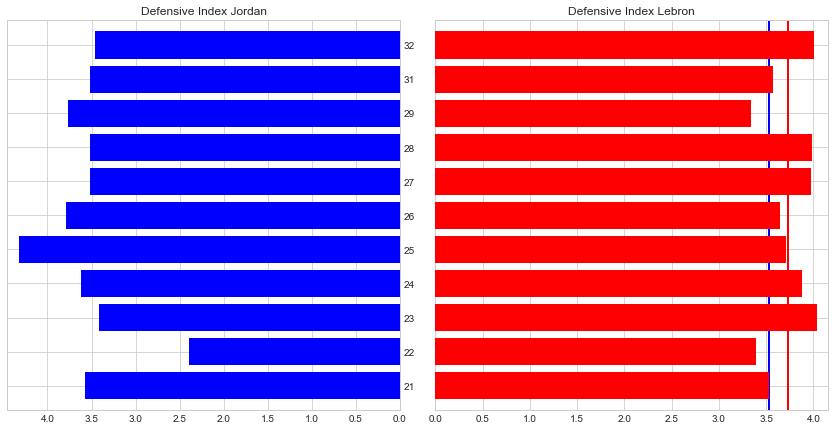

In [47]:
common_ages = np.array([21,22,23,24,25,26,27,28,29,31,32])
d_indexjordan1 = np.array([3.5743902439024393, 2.388888888888889, 3.4182926829268294, 3.6170731707317074, 4.327160493827161, 3.784146341463414, 3.5195121951219517, 3.51875, 3.761538461538462, 3.511764705882353, 3.4609756097560975]) 
d_indexlebron1 = np.array([3.5329113924050635, 3.3897435897435892, 4.033333333333333, 3.879012345679013, 3.7131578947368427, 3.6481012658227847, 3.9725806451612904, 3.9842105263157896, 3.341558441558442, 3.577631578947368, 4.010810810810811])

idx = common_ages.argsort()
common_ages, d_indexjordan1, d_indexlebron1 = [np.take(x, idx) for x in [common_ages, d_indexjordan1, d_indexlebron1]]

y = np.arange(d_indexlebron1.size)




fig, axes = plt.subplots(ncols=2, sharey=True)
axes[0].barh(y, d_indexjordan1, align='center', color='blue', zorder=10)
axes[0].set(title='Defensive Index Jordan')
axes[1].barh(y, d_indexlebron1, align='center', color='red', zorder=10)
axes[1].set(title='Defensive Index Lebron')

axes[0].invert_xaxis()
axes[0].set(yticks=y, yticklabels=common_ages)
axes[0].yaxis.tick_right()

for ax in axes.flat:
    ax.margins(0.03)
    ax.grid(True)

#show jordan career average     
ax.axvline(d_indexjordan1.mean(), color='blue', linewidth=2)    
#show lebron james career average
ax.axvline(d_indexlebron1.mean(), color='red', linewidth=2)  

fig.tight_layout()
fig.subplots_adjust(wspace=0.09)
fig = plt.gcf()
fig.set_size_inches(12.0, 6.5)

fig.savefig('DINDEX_AGE.png', dpi=100)
plt.show()


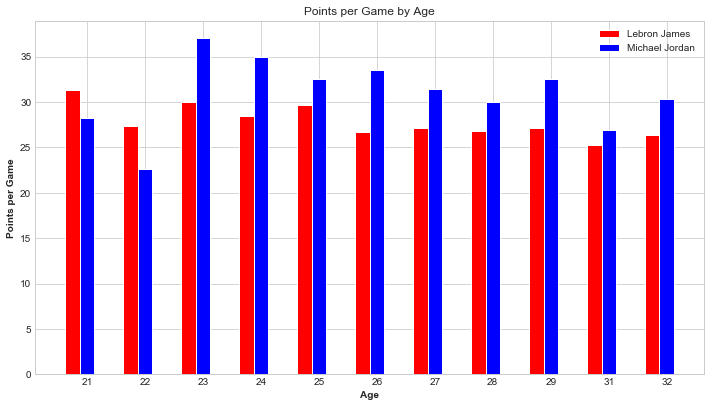

In [48]:
# libraries
#import numpy as np
#import matplotlib.pyplot as plt
 
# set width of bar
barWidth = 0.25
 
# set height of bar
lebronppg = lebronyearsdf.PPG.tolist()
jordanppg = jordanyearsdf. PPG.tolist()

 
# Set position of bar on X axis
r1 = np.arange(len(lebronppg))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
 
# Make the plot
plt.bar(r1, lebronppg, color='red', width=barWidth, edgecolor='white', label='Lebron James')
plt.bar(r2, jordanppg, color='blue', width=barWidth, edgecolor='white', label='Michael Jordan')

 
# Add xticks on the middle of the group bars
plt.xlabel('Age', fontweight='bold')
plt.ylabel('Points per Game', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(lebronppg))], [21,22,23,24,25,26,27,28,29,31,32])
 
# Create legend & Show graphic
plt.legend()
fig = plt.gcf()
fig.set_size_inches(12.0, 6.5)
plt.title("Points per Game by Age")
fig.savefig('PTS_AGE.png', dpi=100)
plt.show()


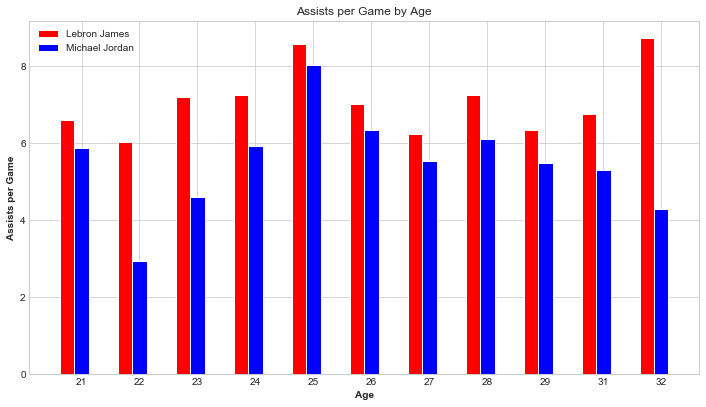

In [49]:
# set width of bar
barWidth = 0.25
 
# set height of bar
lebronapg = lebronyearsdf.ASTPG.tolist()
jordanapg = jordanyearsdf.ASTPG.tolist()

 
# Set position of bar on X axis
r1 = np.arange(len(lebronapg))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
 
# Make the plot
plt.bar(r1, lebronapg, color='red', width=barWidth, edgecolor='white', label='Lebron James')
plt.bar(r2, jordanapg, color='blue', width=barWidth, edgecolor='white', label='Michael Jordan')

 
# Add xticks on the middle of the group bars
plt.xlabel('Age', fontweight='bold')
plt.ylabel('Assists per Game', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(lebronapg))], [21,22,23,24,25,26,27,28,29,31,32])
 
# Create legend & Show graphic
plt.legend()
fig = plt.gcf()
fig.set_size_inches(12.0, 6.5)
plt.title("Assists per Game by Age")
fig.savefig('AST_AGE.png', dpi=100)
plt.show()

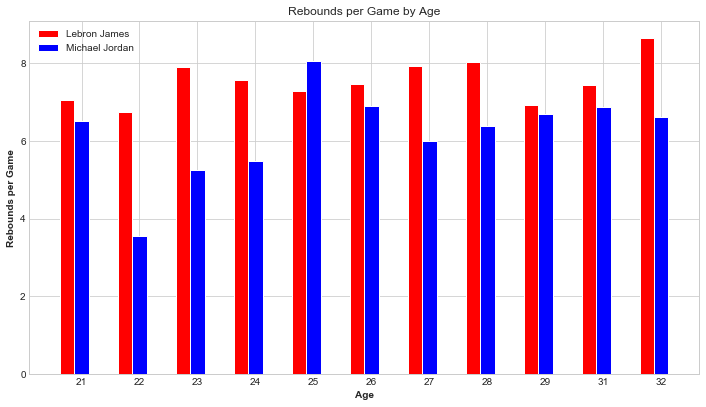

In [50]:


barWidth = 0.25
 
# set height of bar
lebronrpg = lebronyearsdf.RPG.tolist()
jordanrpg = jordanyearsdf.RPG.tolist()

 
# Set position of bar on X axis
r1 = np.arange(len(lebronrpg))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
 
# Make the plot
plt.bar(r1, lebronrpg, color='red', width=barWidth, edgecolor='white', label='Lebron James')
plt.bar(r2, jordanrpg, color='blue', width=barWidth, edgecolor='white', label='Michael Jordan')

 
# Add xticks on the middle of the group bars
plt.xlabel('Age', fontweight='bold')
plt.ylabel('Rebounds per Game', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(lebronrpg))], [21,22,23,24,25,26,27,28,29,31,32])
 
# Create legend & Show graphic
plt.legend()
fig = plt.gcf()
fig.set_size_inches(12.0, 6.5)
plt.title("Rebounds per Game by Age")
fig.savefig('RBG_AGE.png', dpi=100)
plt.show()



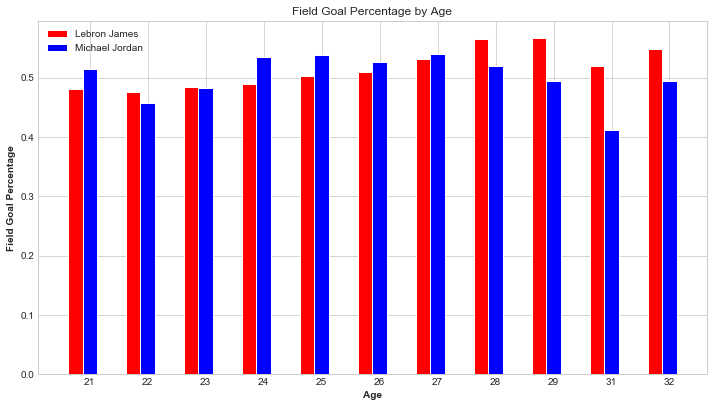

In [51]:
#FGpct


barWidth = 0.25
 
# set height of bar
lebronFGpct = lebronyearsdf.FGpct.tolist()
jordanFGpct = jordanyearsdf.FGpct.tolist()

 
# Set position of bar on X axis
r1 = np.arange(len(lebronFGpct))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
 
# Make the plot
plt.bar(r1, lebronFGpct, color='red', width=barWidth, edgecolor='white', label='Lebron James')
plt.bar(r2, jordanFGpct, color='blue', width=barWidth, edgecolor='white', label='Michael Jordan')

 
# Add xticks on the middle of the group bars
plt.xlabel('Age', fontweight='bold')
plt.ylabel('Field Goal Percentage', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(lebronFGpct))], [21,22,23,24,25,26,27,28,29,31,32])
 
# Create legend & Show graphic
plt.legend()
fig = plt.gcf()
fig.set_size_inches(12.0, 6.5)
plt.title("Field Goal Percentage by Age")
fig.savefig('FG%_AGE.png', dpi=100)
plt.show()



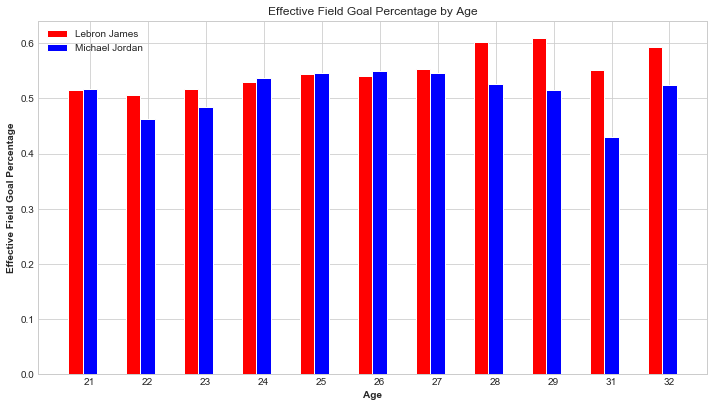

In [52]:
#eFGpct
barWidth = 0.25
 
# set height of bar
lebroneFGpct = lebronyearsdf.eFGpct.tolist()
jordaneFGpct = jordanyearsdf.eFGpct.tolist()

 
# Set position of bar on X axis
r1 = np.arange(len(lebroneFGpct))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
 
# Make the plot
plt.bar(r1, lebroneFGpct, color='red', width=barWidth, edgecolor='white', label='Lebron James')
plt.bar(r2, jordaneFGpct, color='blue', width=barWidth, edgecolor='white', label='Michael Jordan')

 
# Add xticks on the middle of the group bars
plt.xlabel('Age', fontweight='bold')
plt.ylabel('Effective Field Goal Percentage', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(lebroneFGpct))], [21,22,23,24,25,26,27,28,29,31,32])
 
# Create legend & Show graphic
plt.legend()

fig = plt.gcf()
fig.set_size_inches(12.0, 6.5)
plt.title("Effective Field Goal Percentage by Age")
fig.savefig('EFG_AGE.png', dpi=100)

plt.show()


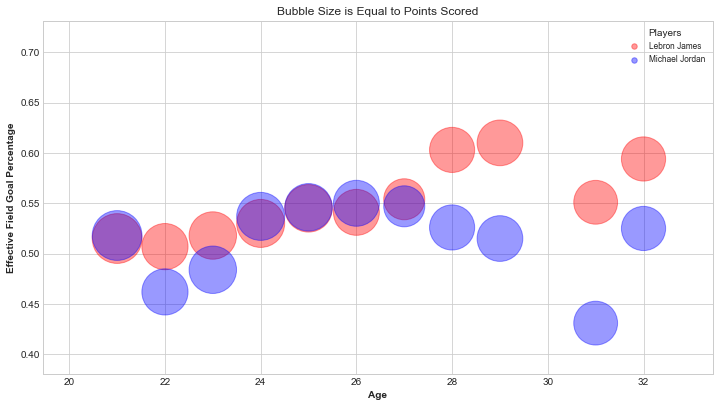

In [53]:
# create data



x = common_ages
y = lebronyearsdf.eFGpct.tolist()
z = lebronyearsdf.PTS.tolist()
 
# Change color with c and alpha
plt.scatter(x, y, s=z*4000, c="red", alpha=0.4, label="Lebron James")

x1 = common_ages
y1 = jordanyearsdf.eFGpct.tolist()
z1 = jordanyearsdf.PTS.tolist()
plt.scatter(x1, y1, s=z*4000, c="blue", alpha=0.4, label="Michael Jordan")


plt.xlabel('Age', fontweight='bold')
plt.ylabel('Effective Field Goal Percentage', fontweight='bold')

#scatter1 = plt.scatter(x, y, s=z, c="red", alpha=0.4)
#scatter2 = plt.scatter(x1, y1, s=z, c="blue", alpha=0.4)

#legend1 = ax.legend(*scatter1.legend_elements(),
                    #loc="lower left", title="Lebron James")
#legend2 = ax.legend(*scatter2.legend_elements(),
                    #loc="lower left", title="Michael Jordan")

#ax.add_artist(legend1)

lgnd = plt.legend(fontsize="small", mode="Expanded", 
                  numpoints=1, scatterpoints=1, 
                  loc="best", title="Players", 
                  labelspacing=0.5)
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]

#figure(num=None, figsize=(100, 100), dpi=500, facecolor='w', edgecolor='k')
fig = plt.gcf()
fig.set_size_inches(12.0, 6.5)
plt.title("Bubble Size is Equal to Points Scored")
fig.savefig('points_EFG%.png', dpi=100)


plt.show()